### Sentiment Analysis using Python

#### Data Preprocessing 

In [24]:
import pandas as pd
import matplotlib as plt
df = pd.read_csv("d:/data/Tweets.csv")

In [25]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [26]:
df.shape

(14640, 15)

In [27]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [28]:
# There are more than 14,000 data samples in the sentiment analysis dataset

In [29]:
review_df = df[['text','airline_sentiment']]
print(review_df.shape)
review_df.head(30)

(14640, 2)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive
7,@VirginAmerica Really missed a prime opportuni...,neutral
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",positive
9,"@VirginAmerica it was amazing, and arrived an ...",positive


In [30]:
df['text'].values[10]

'@VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24'

In [31]:
df['airline_sentiment'].value_counts(0).sort_index()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

Text(0.5, 0, 'Airline_Sentiment')

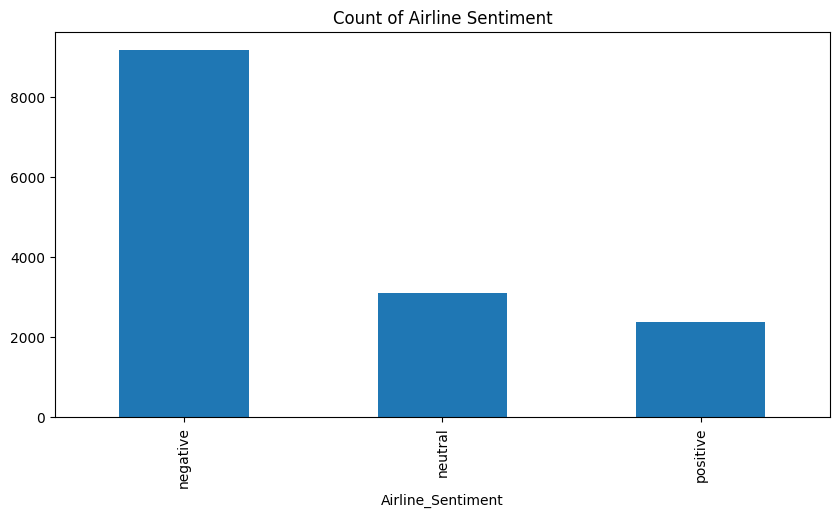

In [33]:
ax=df['airline_sentiment'].value_counts(0).sort_index().plot(kind='bar', title='Count of Airline Sentiment', figsize=(10,5))
ax.set_xlabel('Airline_Sentiment')

In [41]:
# Lets take one example of the review
ex=df['text'][20]

In [42]:
print (ex)

@VirginAmerica why are your first fares in May over three times more than other carriers when all seats are available to select???


In [43]:
#Lets tokenize the previous example using nltk
import nltk
nltk.word_tokenize(ex)

['@',
 'VirginAmerica',
 'why',
 'are',
 'your',
 'first',
 'fares',
 'in',
 'May',
 'over',
 'three',
 'times',
 'more',
 'than',
 'other',
 'carriers',
 'when',
 'all',
 'seats',
 'are',
 'available',
 'to',
 'select',
 '?',
 '?',
 '?']

In [45]:
tokens=nltk.word_tokenize(ex)
tokens[:10]

['@',
 'VirginAmerica',
 'why',
 'are',
 'your',
 'first',
 'fares',
 'in',
 'May',
 'over']

In [46]:
nltk.pos_tag(tokens) # each pos is defined in the slides

[('@', 'NN'),
 ('VirginAmerica', 'NNP'),
 ('why', 'WRB'),
 ('are', 'VBP'),
 ('your', 'PRP$'),
 ('first', 'JJ'),
 ('fares', 'NNS'),
 ('in', 'IN'),
 ('May', 'NNP'),
 ('over', 'IN'),
 ('three', 'CD'),
 ('times', 'NNS'),
 ('more', 'RBR'),
 ('than', 'IN'),
 ('other', 'JJ'),
 ('carriers', 'NNS'),
 ('when', 'WRB'),
 ('all', 'DT'),
 ('seats', 'NNS'),
 ('are', 'VBP'),
 ('available', 'JJ'),
 ('to', 'TO'),
 ('select', 'VB'),
 ('?', '.'),
 ('?', '.'),
 ('?', '.')]

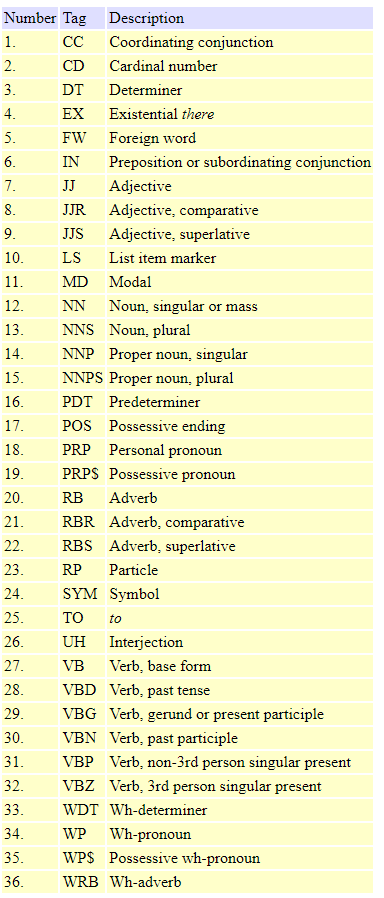

In [49]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [51]:
sia=SentimentIntensityAnalyzer()

In [54]:
sia.polarity_scores('I left school when i was 14, i feel so sad about it') # compound[-1,1] it is calculated based on the 
                                                                           # aggregation of the results

{'neg': 0.307, 'neu': 0.693, 'pos': 0.0, 'compound': -0.6113}

In [55]:
sia.polarity_scores('I am happy to have seen you after these long years')

{'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'compound': 0.5719}

In [56]:
sia.polarity_scores(ex)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [69]:
# Run the polarity score on the entire dataset
res = {} # store the results in a dictionary called re
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['text']
    myid = row['tweet_id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/14640 [00:00<?, ?it/s]

In [72]:
res

{570306133677760513: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 570301130888122368: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 570301083672813571: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 570301031407624196: {'neg': 0.246,
  'neu': 0.754,
  'pos': 0.0,
  'compound': -0.5984},
 570300817074462722: {'neg': 0.321,
  'neu': 0.679,
  'pos': 0.0,
  'compound': -0.5829},
 570300767074181121: {'neg': 0.256,
  'neu': 0.67,
  'pos': 0.074,
  'compound': -0.5945},
 570300616901320704: {'neg': 0.0,
  'neu': 0.678,
  'pos': 0.322,
  'compound': 0.6908},
 570300248553349120: {'neg': 0.16,
  'neu': 0.643,
  'pos': 0.197,
  'compound': 0.1458},
 570299953286942721: {'neg': 0.367,
  'neu': 0.415,
  'pos': 0.218,
  'compound': -0.3477},
 570295459631263746: {'neg': 0.0,
  'neu': 0.642,
  'pos': 0.358,
  'compound': 0.7717},
 570294189143031808: {'neg': 0.375,
  'neu': 0.625,
  'pos': 0.0,
  'compound': -0.8555},
 570289724453216256: {'neg': 0.0,
  'neu': 0.435,
 

In [75]:
# Store res into a dataframe

pd.DataFrame(res)

,570306133677760513,570301130888122368,570301083672813571,570301031407624196,570300817074462722,570300767074181121,570300616901320704,570300248553349120,570299953286942721,570295459631263746,...,569588473050611712,569588464896876545,569587813856841728,569587705937600512,569587691626622976,569587686496825344,569587371693355008,569587242672398336,569587188687634433,569587140490866689
neg,0.0,0.0,0.0,0.2460,0.3210,0.2560,0.0000,0.1600,0.3670,0.0000,...,0.0000,0.1210,0.2260,0.073,0.0,0.0000,0.2860,0.0000,0.0000,0.0000
neu,1.0,1.0,1.0,0.7540,0.6790,0.6700,0.6780,0.6430,0.4150,0.6420,...,0.4840,0.7810,0.7740,0.927,1.0,0.7830,0.7140,0.7230,0.8660,0.9520
pos,0.0,0.0,0.0,0.0000,0.0000,0.0740,0.3220,0.1970,0.2180,0.3580,...,0.5160,0.0980,0.0000,0.000,0.0,0.2170,0.0000,0.2770,0.1340,0.0480
compound,0.0,0.0,0.0,-0.5984,-0.5829,-0.5945,0.6908,0.1458,-0.3477,0.7717,...,0.4926,-0.1531,-0.5216,-0.128,0.0,0.3612,-0.7906,0.3182,0.5027,0.0772


In [76]:
pd.DataFrame(res).T

,neg,neu,pos,compound
570306133677760513,0.000,1.000,0.000,0.0000
570301130888122368,0.000,1.000,0.000,0.0000
570301083672813571,0.000,1.000,0.000,0.0000
570301031407624196,0.246,0.754,0.000,-0.5984
570300817074462722,0.321,0.679,0.000,-0.5829
...,...,...,...,...
569587686496825344,0.000,0.783,0.217,0.3612
569587371693355008,0.286,0.714,0.000,-0.7906
569587242672398336,0.000,0.723,0.277,0.3182
569587188687634433,0.000,0.866,0.134,0.5027


In [70]:
# VADER (Valence Aware Dictionary and Sentiment Reasoner) - Bag of words approach, and also stop words are removed. the remaing
# words will be assessed wether +, - or neutral in the statement. Each word is scored and combined to a total score


vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'tweet_id'})
vaders = vaders.merge(df, how='left')

In [77]:
vaders.head(5)

,tweet_id,neg,neu,pos,compound,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,0.000,1.000,0.0,0.0000,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,0.000,1.000,0.0,0.0000,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,0.000,1.000,0.0,0.0000,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,0.246,0.754,0.0,-0.5984,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,0.321,0.679,0.0,-0.5829,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


Text(0.5, 1.0, 'Compound Sentiment')

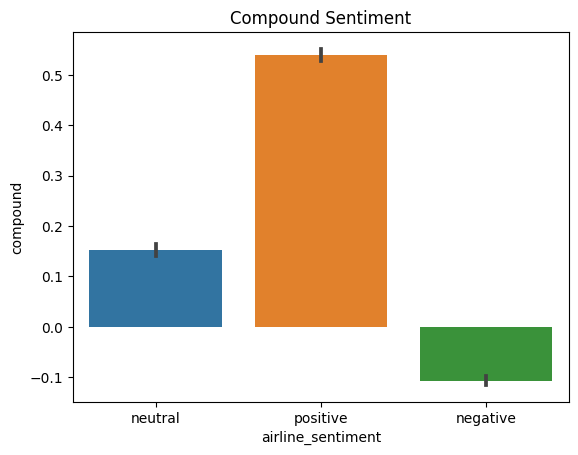

In [82]:
import seaborn as sns
ax = sns.barplot(data=vaders, x='airline_sentiment', y='compound')
ax.set_title('Compound Sentiment')